Import packages

In [30]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set

<function seaborn.rcmod.set>

Import Data

In [31]:
col_names = ['fruit_name', 'fruit_subtype', 'mass', 'width', 'height', 'color_score']

df = pd.read_csv("fruit_test111.csv", header=None, names=col_names)
df.head()

,fruit_name,fruit_subtype,mass,width,height,color_score
0,apple,granny_smith,192,8.4,7.3,0.55
1,apple,granny_smith,180,8.0,6.8,0.59
2,apple,granny_smith,176,7.4,7.2,0.60
3,mandarin,mandarin,86,6.2,4.7,0.80
4,mandarin,mandarin,84,6.0,4.6,0.79


In [32]:
fruit_name_mapping = {
    'lemon'  :   4,
    'orange' :   3,
    'mandarin' : 2,
    'apple' :    1}

df['fruit_name'] = df['fruit_name'].map(fruit_name_mapping)
print(df)

    fruit_name     fruit_subtype  mass  width  height  color_score
0            1      granny_smith   192    8.4     7.3         0.55
1            1      granny_smith   180    8.0     6.8         0.59
2            1      granny_smith   176    7.4     7.2         0.60
3            2          mandarin    86    6.2     4.7         0.80
4            2          mandarin    84    6.0     4.6         0.79
5            2          mandarin    80    5.8     4.3         0.77
6            1          braeburn   178    7.1     7.8         0.92
7            1          braeburn   172    7.4     7.0         0.89
8            1          braeburn   166    6.9     7.3         0.93
9            1          braeburn   172    7.1     7.6         0.92
10           1          braeburn   154    7.0     7.1         0.88
11           1          braeburn   164    7.3     7.7         0.70
12           1  golden_delicious   152    7.6     7.3         0.69
13           1  golden_delicious   156    7.7     7.1         

Create the training set and test

In [33]:
xtrain = df.drop('fruit_subtype', axis = 1)
ytrain = df.loc[:, 'fruit_subtype']

xtest = df.drop('fruit_subtype', axis = 1)
ytest = df.loc[:, 'fruit_subtype']

The Gaussian Classifier

In [34]:
model = GaussianNB()

Train the model

In [35]:
model.fit(xtrain, ytrain)

GaussianNB(priors=None, var_smoothing=1e-09)

Predict Output

In [36]:
pred = model.predict(xtest)

Plot confusion Matrix

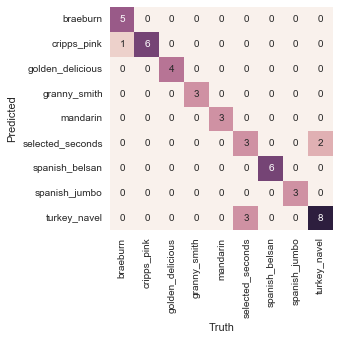

In [37]:
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square = True, annot = True, fmt = 'd', cbar = False,
           xticklabels = names, yticklabels = names)
plt.xlabel('Truth')
plt.ylabel('Predicted')